In [1]:
import pandas as pd
import numpy as np

# графики
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(15,7))

import ast

## Импорт датафрейма и первый взгляд на данные:

In [2]:
df = pd.read_csv('us events ad_revenue filtered 03.02-07.02.csv')
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [3]:
df.shape

(860079, 16)

In [4]:
# Анализ пропущенных значений
def na(dfr):
    na_df = dfr.isna().sum().reset_index()
    na_df = na_df.rename(columns={'index':'columns', 0:'total_missing'})
    na_df['%%%'] = na_df['total_missing']*100/dfr.shape[0]
    return na_df

na(df)

,columns,total_missing,%%%
0,profile_id,14,0.001628
1,os_version,0,0.000000
2,device_manufacturer,0,0.000000
3,device_model,0,0.000000
4,device_type,0,0.000000
5,device_locale,0,0.000000
6,event_name,0,0.000000
7,event_json,0,0.000000
8,event_datetime,0,0.000000
9,event_timestamp,0,0.000000


## Важная информация содержится в столбце event_json, поэтому разберемся с ним:

In [5]:
df1 = pd.DataFrame(df['event_json'].apply(ast.literal_eval).values.tolist())
df1['ecpm'] = df1['revenue']*1000
df1.head()

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId,ecpm
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ,0.510313
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ,0.510313
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58,2.386163
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364,13.893784
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw,6.827570


In [6]:
# отбросим столбцы, которые не требуются для анализа (точнее, не включены в ТЗ)
df1.drop(['placement', 'cur_ticks', 'ecpm_sma', 'value', 'currency', 'ad_country_code', 'ad_unit_id', 'ad_network_placement', 
          'creativeId', 'network_name', 'view_index', 'session_view_index'], axis=1, inplace=True)

In [7]:
df = pd.concat([df.drop('event_json', axis=1), df1],axis=1)
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_datetime,event_timestamp,event_receive_datetime,...,connection_type,operator_name,country_iso_code,city,ad_type,session_length,revenue,ads_ltv,normalized_ecpm_sma,ecpm
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,...,wifi,NaN,US,Norwalk,banner,705.88070,0.000510,0.487877,0.511508,0.510313
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,...,wifi,NaN,US,Norwalk,banner,722.65120,0.000510,0.488387,0.511389,0.510313
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,...,wifi,Verizon,US,Charlotte,banner,431.81290,0.002386,0.678479,0.928597,2.386163
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,...,wifi,T-Mobile,US,Cocoa,int,125.94960,0.013894,0.013894,13.893784,13.893784
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,...,cell,Verizon,US,NaN,banner,12.71129,0.006828,0.060571,1.660282,6.827570


In [8]:
na(df)

,columns,total_missing,%%%
0,profile_id,14,0.001628
1,os_version,0,0.000000
2,device_manufacturer,0,0.000000
3,device_model,0,0.000000
4,device_type,0,0.000000
5,device_locale,0,0.000000
6,event_name,0,0.000000
7,event_datetime,0,0.000000
8,event_timestamp,0,0.000000
9,event_receive_datetime,0,0.000000


In [9]:
df.dropna(inplace=True)

# ЗАДАНИЕ 1.
Для каждого формата рекламы:

a. построить распределение средних eCPM-ов юзеров

b. отобразить средние eCPM-ы по городам, версиям ОС

c. отобразить суммарные доходы по городам, версиям ОС

### Для начала создадим 3 отдельных датасета в зависимости от формата рекламы:

In [10]:
int_df = df.loc[df['ad_type']=='int']
banner_df = df.loc[df['ad_type']=='banner']
rv_df = df.loc[df['ad_type']=='rv']

## 1.1 Построить распределение средних eCPM-ов юзеров

Я использую в качестве показателя среднего медиану, потому что в данных есть выбросы, которые сильно искажают картину

Сначала посмотрим на гистограммы, чтобы понять, как вообще выглядит наше распределение:

Text(0.5, 1.0, 'AD_TYPE: RV')

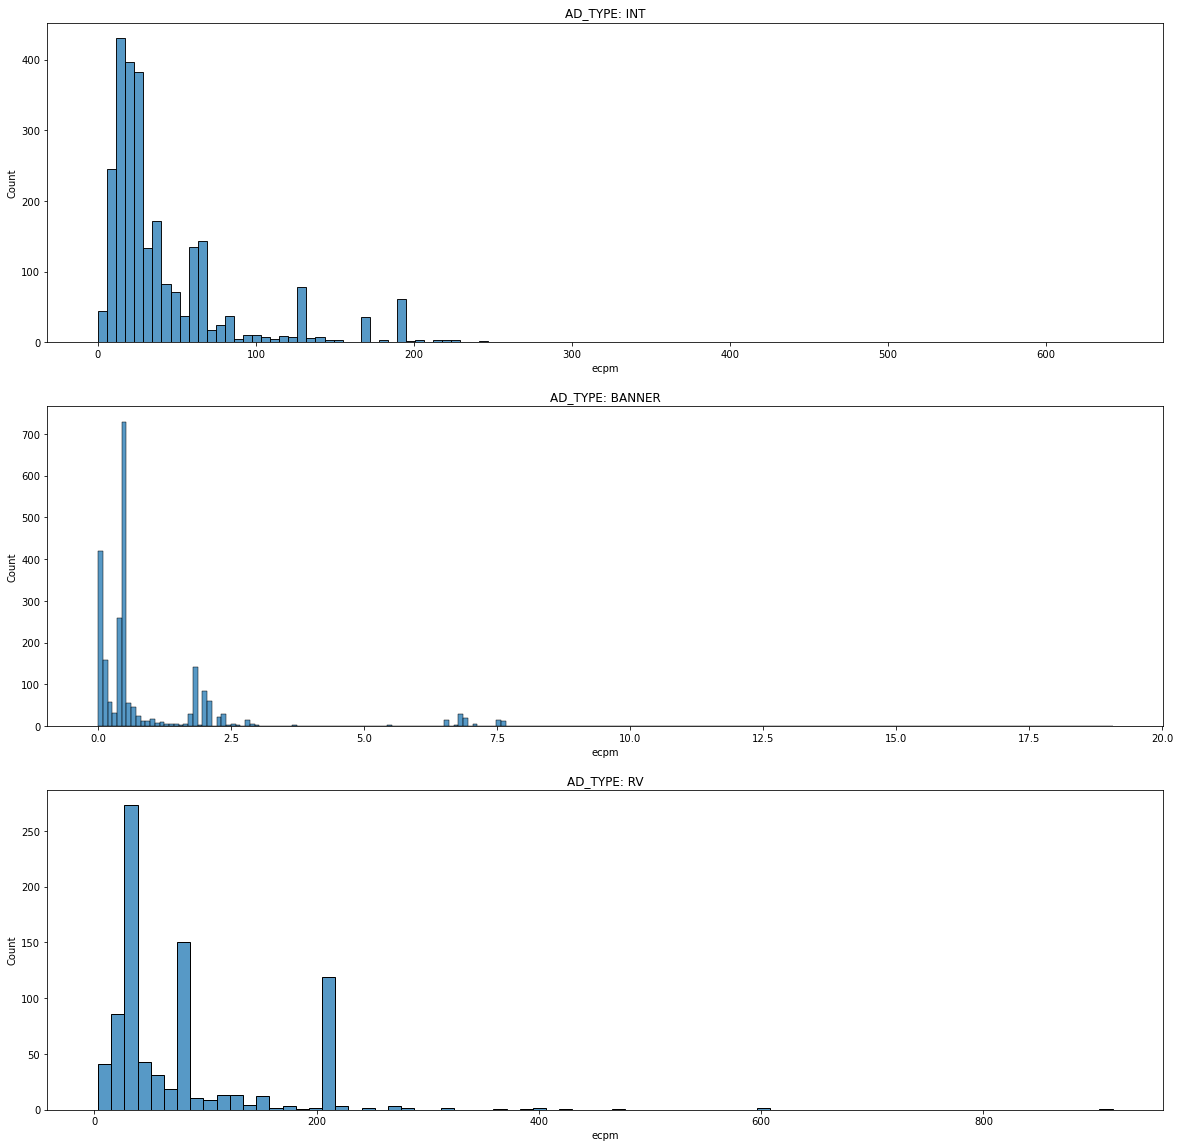

In [11]:
fig, axes = plt.subplots(3,1, figsize=(20,20))

sns.histplot(int_df.groupby('profile_id')['ecpm'].median(), ax=axes[0])
axes[0].set_title('AD_TYPE: INT')

sns.histplot(banner_df.groupby('profile_id')['ecpm'].median(), ax=axes[1])
axes[1].set_title('AD_TYPE: BANNER')

sns.histplot(rv_df.groupby('profile_id')['ecpm'].median(), ax=axes[2])
axes[2].set_title('AD_TYPE: RV')

Теперь посмотрим на ящики с усами, чтобы увидеть средние средних:)

MEDIAN: INT 24.596382139148503
MEDIAN: BANNER 0.49687600000000004
MEDIAN: RV 43.8653836875


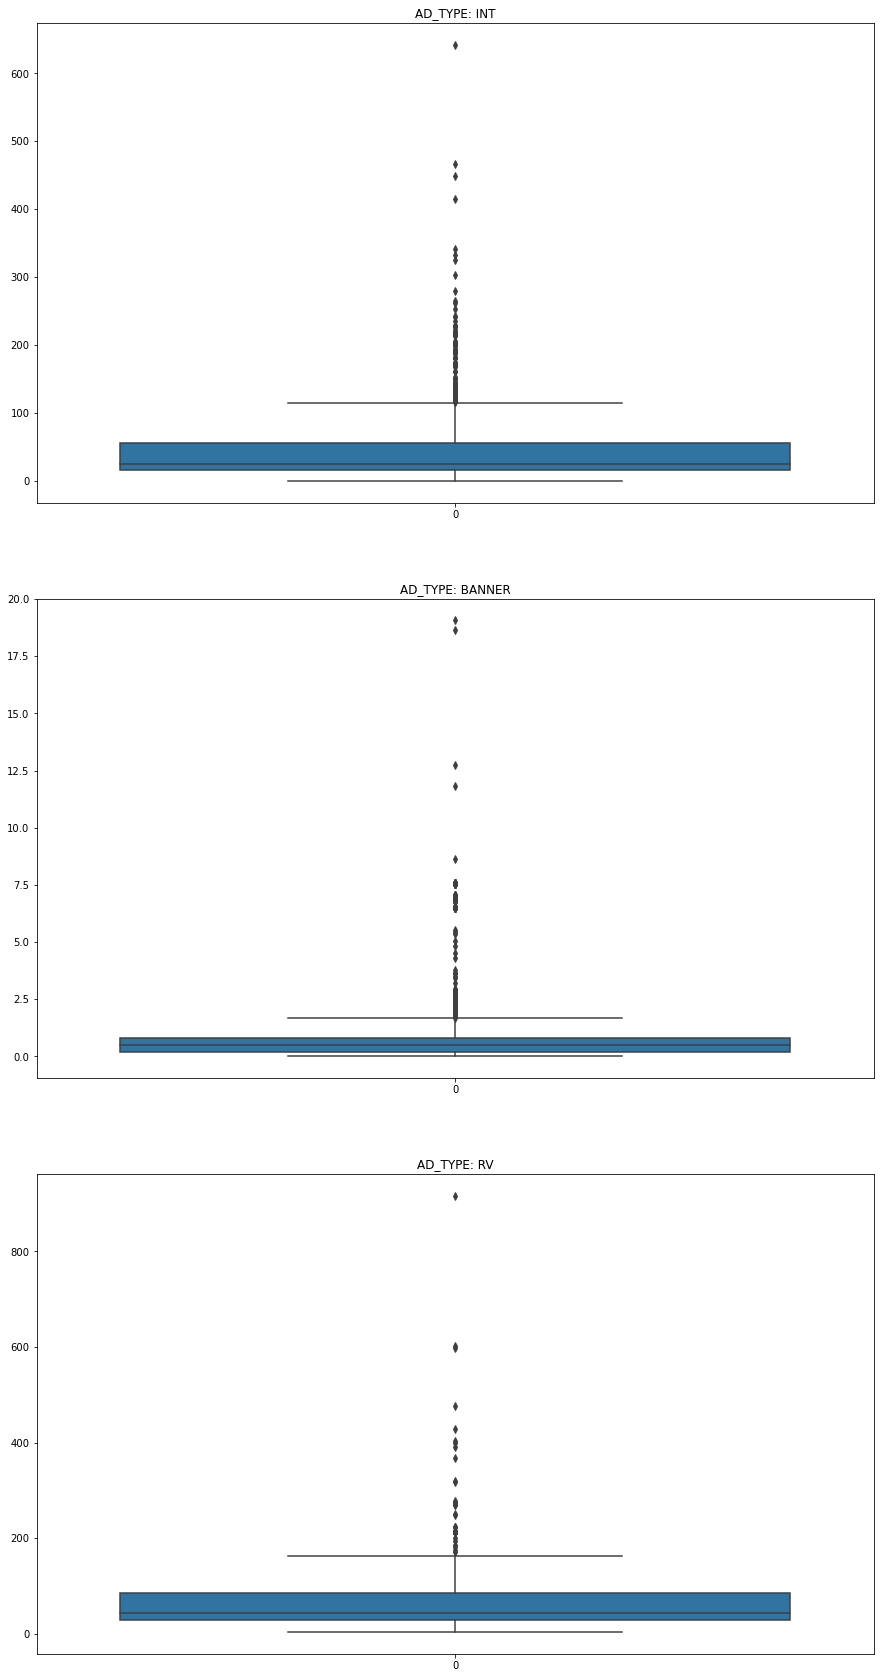

In [12]:
fig, axes = plt.subplots(3,1, figsize=(15,30))

sns.boxplot(data=int_df.groupby('profile_id')['ecpm'].median(), ax=axes[0])
axes[0].set_title('AD_TYPE: INT')
print('MEDIAN: INT', (int_df.groupby('profile_id')['ecpm'].median()).median())

sns.boxplot(data=banner_df.groupby('profile_id')['ecpm'].median(), ax=axes[1])
axes[1].set_title('AD_TYPE: BANNER')
print('MEDIAN: BANNER', (banner_df.groupby('profile_id')['ecpm'].median()).median())

sns.boxplot(data=rv_df.groupby('profile_id')['ecpm'].median(), ax=axes[2])
axes[2].set_title('AD_TYPE: RV')
print('MEDIAN: RV', (rv_df.groupby('profile_id')['ecpm'].median()).median())

Ух как тут много аномально высоких значений...

По графикам можно сказать, что распределение eCPM-ов ненормально, поэтому для определения наличия\отсутствия статистических различий между средними значениями eCPM-ов пользователей в зависимости от формата рекламы будем использовать непараметрический тест Краскела-Уоллиса

In [13]:
from scipy.stats import kruskal

_, p_value = kruskal(int_df['ecpm'], banner_df['ecpm'], rv_df['ecpm'])
p_value

0.0

Так как p-value значительно меньше 0.05, мы отклоняем нулевую гипотезу об отсутствии различий между средними наших групп. Теперь попарно сравним средние с помощью критерия Манна-Уитни

In [14]:
from scipy.stats import mannwhitneyu

print(mannwhitneyu(int_df['ecpm'], banner_df['ecpm']))
print(mannwhitneyu(int_df['ecpm'], rv_df['ecpm']))
print(mannwhitneyu(banner_df['ecpm'], rv_df['ecpm']))

MannwhitneyuResult(statistic=11407897353.0, pvalue=0.0)
MannwhitneyuResult(statistic=29925784.0, pvalue=0.0)
MannwhitneyuResult(statistic=6501615.5, pvalue=0.0)


Везде p-value равно 0, поэтому делаем вывод о наличии статистически значимых различий между средними значениями eCPM-ов пользователей в зависимости от формата рекламы.

На основании медианных значений:

MEDIAN: INT 24.596382139148503

MEDIAN: BANNER 0.49687600000000004

MEDIAN: RV 39.8617142857143

Делаем вывод, что форматом рекламы с самым высоким ecpm является RV, а с самым низким - Banner

In [15]:
rv_df.shape

(4166, 21)

In [16]:
int_df.shape

(23154, 21)

In [17]:
banner_df.shape

(495409, 21)

Однако я бы с осторожностью отнеслась к данным результатам по причине несбалансированности выборок. Возможно наименьшие выборки не являются достаточно репрезентативными.

## 1.2. Отобразить средние eCPM-ы по городам, версиям ОС

Сначала просто посмотрим, какие города и версии ОС вообще есть в данных:

In [18]:
for i in ['city', 'os_version']:
    print(i)
    print('КОЛИЧЕСТВО УНИКАЛЬНЫХ ЗНАЧЕНИЙ: ', len(df[i].unique()))
    print("УНИКАЛЬНЫЕ ЗНАЧЕНИЯ:\n", df[i].unique())
    print('-'*30)

city
КОЛИЧЕСТВО УНИКАЛЬНЫХ ЗНАЧЕНИЙ:  904
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ:
 ['Charlotte' 'Cocoa' 'Columbus' 'Jamestown' 'Austin' 'Minot' 'Milwaukee'
 'McKeesport' 'New Albany' 'Kansas City' 'Ypsilanti' 'Indianapolis'
 'Geneva' 'Tampa' 'Saint Paul' 'Trenton' 'Cherry Hill' 'Lafayette'
 'New York' 'Dayton' 'Alexandria' 'Hayward' 'San Francisco' 'Decatur'
 'Birmingham' 'Madison' 'Sioux Falls' 'Roosevelt' 'Grand Rapids' 'Wichita'
 'Louisville' 'Overland Park' 'Gainesville' 'Grants Pass' 'Shreveport'
 'Springfield' 'DeKalb' 'West Jordan' 'Kalispell' 'Portland'
 'Farmingville' 'Schenectady' 'Oklahoma City' 'Jacksonville' 'Dallas'
 'Santa Maria' 'Madison Heights' 'Minneapolis' 'Nashville' 'Houston'
 'Cape Coral' 'Atlanta' 'Sacramento' 'Pittsburgh' 'Norwalk' 'Lenoir City'
 'Phoenix' 'Greenville' 'Augusta' 'Philadelphia' 'Detroit' 'Shelbyville'
 'Fishers' 'Claremore' 'Wasilla' 'Carmel' 'Seattle' 'Chicago' 'Eugene'
 'Tacoma' 'Ocala' 'Winter Garden' 'Palm Coast' 'Tulsa' 'Spokane'
 'Kankakee' 'Bangor' 'Fargo' 

 'Folsom' 'Swedesboro' 'Grove City']
------------------------------
os_version
КОЛИЧЕСТВО УНИКАЛЬНЫХ ЗНАЧЕНИЙ:  10
УНИКАЛЬНЫЕ ЗНАЧЕНИЯ:
 ['11' '10' '12' '9' '8.0.0' '6.0.1' '8.1.0' '7.0' '7.1.2' '7.1.1']
------------------------------


У нас достаточно много уникальных городов, а вот версий OC всего 11.

Я сначала займусь версиями ОС, потому что с ними легче, но перед этим....

# РАССЧИТАЕМ МИНИМАЛЬНЫЙ РАЗМЕР ВЫБОРКИ ДЛЯ ПРОВЕДЕНИЯ ИССЛЕДОВАНИЙ!!

Я воспользуюсь онлайн-калькулятором: https://ru.surveymonkey.com/mp/sample-size-calculator/ <br>
Степерь достоверности возьму в 95%, погрешность в 5%

Количество наблюдений формата рекламы rv: 6482 <br>
**Минимальное количество наблюдений для категории rv: 363**

    
Количество наблюдений формата рекламы int: 37613 <br>
**Минимальное количество наблюдений для категории int: 381**


Количество наблюдений формата рекламы banner: 815984 <br>
**Минимальное количество наблюдений для категории banner: 384**

In [19]:
rv_count = 363
int_count = 381
banner_count = 384

### ---------------------------------------------------------------------------------------------
### OC

In [20]:
# Сначала просто посмотрим на количество каждой версии OC
df.groupby('ad_type')['os_version'].value_counts()
# Ага, у нас есть версии, которые представлены меньшим количеством наблюдений, нежели нам необходимо

ad_type  os_version
banner   12            241388
         11            130469
         10             77903
         9              35829
         8.0.0           4074
         8.1.0           3983
         7.0              882
         7.1.2            690
         6.0.1            183
         7.1.1              8
int      12             10632
         11              7270
         10              3194
         9               1626
         8.0.0            182
         8.1.0            141
         7.0               62
         7.1.2             31
         6.0.1             13
         7.1.1              3
rv       12              2030
         11              1366
         10               483
         9                238
         8.0.0             34
         8.1.0             11
         6.0.1              3
         7.0                1
Name: os_version, dtype: int64

<AxesSubplot:xlabel='os_version', ylabel='count'>

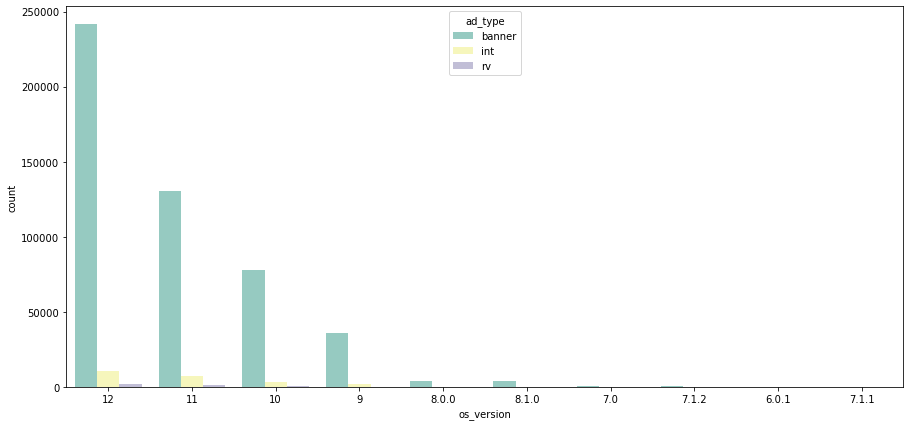

In [21]:
# более наглядно это на графике
sns.countplot(x=df['os_version'], hue=df['ad_type'], order=df['os_version'].value_counts().index, palette="Set3")

Не берем в расчет те позиции, количество наблюдений которых недостаточно для проведения статистических тестов

In [22]:
# для баннеров мы берем все категории, поэтому оставляем датасет без изменения

# для int мы берем только версии 12, 11, 10 и 9
int_df_os = int_df.loc[int_df['os_version'].isin(['12','11','10','9'])]

# для rv мы тоже берем только версии 12, 11, 10 и 9
rv_df_os = rv_df.loc[rv_df['os_version'].isin(['12','11','10','9'])]

### Посмотрим на средние значения ecpm в зависимости от ос:

Сначала просто в цифрах:

In [23]:
# для типа banner
banner_df.groupby('os_version')['ecpm'].describe()

,count,mean,std,min,25%,50%,75%,max
os_version,,,,,,,,
10,77903.0,0.596246,1.098920e+00,0.000110,0.040490,0.494196,0.530292,20.430394
11,130469.0,0.562976,1.157816e+00,0.000215,0.025921,0.240152,0.517167,31.966212
12,241388.0,0.936277,1.598357e+00,0.000080,0.087492,0.496876,0.533385,41.421806
6.0.1,183.0,0.353189,1.010320e+00,0.002220,0.041249,0.069897,0.494196,6.827570
7.0,882.0,0.318541,7.331809e-01,0.007013,0.014251,0.044650,0.494196,6.557208
7.1.1,8.0,0.517167,1.186878e-16,0.517167,0.517167,0.517167,0.517167,0.517167
7.1.2,690.0,0.126915,2.952984e-01,0.001594,0.007213,0.011013,0.029133,2.386163
8.0.0,4074.0,0.538670,8.389351e-01,0.005462,0.059643,0.494196,0.530292,7.519341
8.1.0,3983.0,0.402337,6.279186e-01,0.001535,0.024095,0.494196,0.530292,7.519341


In [24]:
# для типа int
int_df_os.groupby('os_version')['ecpm'].describe()

,count,mean,std,min,25%,50%,75%,max
os_version,,,,,,,,
10,3194.0,33.295071,47.721905,1.215139,11.391233,20.160000,31.067597,921.145020
11,7270.0,31.675248,40.703278,0.441572,11.351300,20.160000,30.799355,650.000000
12,10632.0,42.213587,53.105608,0.580125,13.160984,23.632498,51.985721,937.195984
9,1626.0,26.981634,37.925286,0.000000,9.623232,17.393150,24.596382,350.000000


In [25]:
# для типа rv
rv_df_os.groupby('os_version')['ecpm'].describe()

,count,mean,std,min,25%,50%,75%,max
os_version,,,,,,,,
10,483.0,62.831286,65.228644,2.510362,28.240000,35.257735,80.640000,597.984497
11,1366.0,49.845071,71.567015,1.149412,19.858686,28.240000,41.768826,915.771301
12,2030.0,81.851312,86.986268,1.555500,28.240000,36.156206,82.907089,916.205811
9,238.0,39.953895,49.984800,1.424175,16.478092,28.240000,31.468961,269.850006


В принципе уже на этот этапе можно понять, что в данных просто жутчайшие выбросы

Text(0.5, 1.0, 'AD_TYPE: RV')

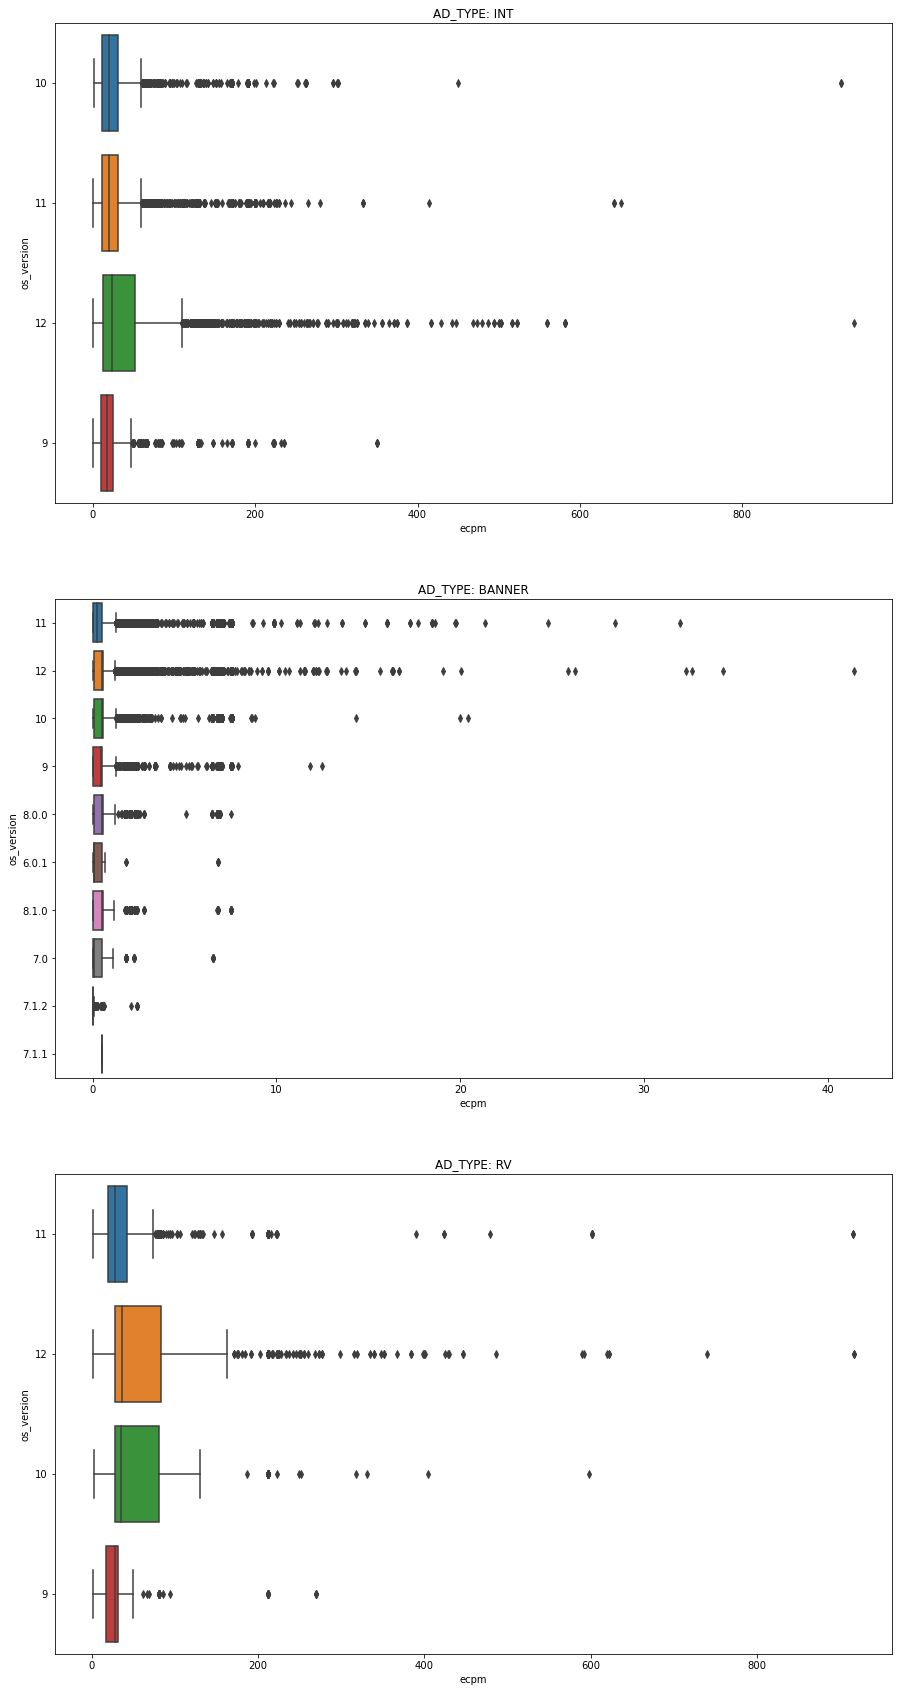

In [56]:
# теперь построим ящики с усами
fig, axes = plt.subplots(3,1, figsize=(15,30))

sns.boxplot(x=int_df_os['ecpm'], y=int_df_os['os_version'], ax=axes[0])
axes[0].set_title('AD_TYPE: INT')

sns.boxplot(x=banner_df['ecpm'], y=banner_df['os_version'], ax=axes[1])
axes[1].set_title('AD_TYPE: BANNER')

sns.boxplot(x=rv_df_os['ecpm'], y=rv_df_os['os_version'], ax=axes[2])
axes[2].set_title('AD_TYPE: RV')

Вне зависимости от формата рекламы мы видим, что у 10, 11 и 12 версий ecpm превышает ecpm других версий ос

p-value везде практически нулевой, поэтому делаем вывод, что различия между медианами есть, и они неслучайны.

Думаю, что разница дисперсий тут в каком-то смысле даже более интересна.

### ___________________________________________________________________________
### CITY

In [27]:
df.city.value_counts()

New York         17384
Minneapolis      12978
Springfield      10135
Houston          10135
Charlotte         9716
                 ...  
Bellflower           1
Suffolk              1
Beaumont             1
Columbia City        1
Grove City           1
Name: city, Length: 904, dtype: int64

<AxesSubplot:xlabel='city', ylabel='Count'>

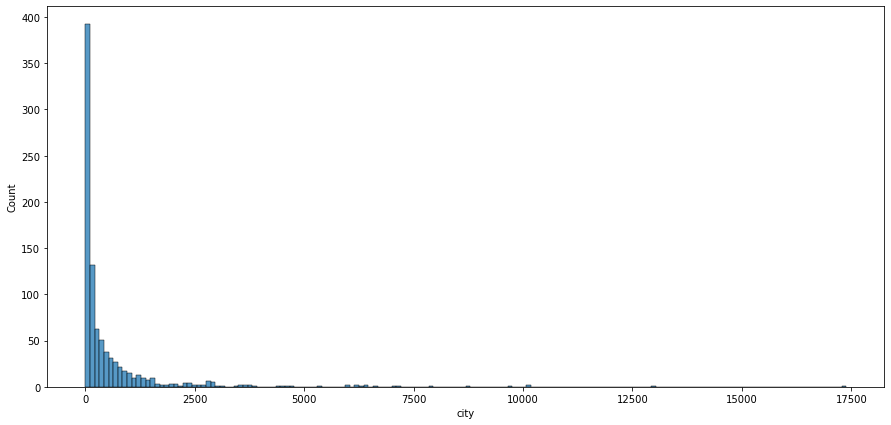

In [28]:
sns.histplot(data=df.city.value_counts())

На графике видно, что почти 50% всех представленных городов встречаются всего несколько раз, а значит мы опять отбросим кучу городов...

In [29]:
def drop_cities(dfr, count):
    cities = dict(dfr.city.value_counts())
    dfr['city'] = dfr['city'].apply(lambda x: 'Other' if cities[x]<count else x)
    dfr = dfr.loc[~dfr.city.isin(['Other'])]
    return dfr

banner_df_city = drop_cities(banner_df, banner_count)
int_df_city = drop_cities(int_df, int_count)
rv_df_city = drop_cities(rv_df, rv_count)

C:\Users\petti\AppData\Local\Temp/ipykernel_15588/1128905600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['city'] = dfr['city'].apply(lambda x: 'Other' if cities[x]<count else x)


In [30]:
print('INT\n', int_df_city.city.value_counts(), '\n')
print('RV\n', rv_df_city.city.value_counts(), '\n')
print('BANNER\n', banner_df_city.city.value_counts(), '\n')

INT
 Minneapolis    718
New York       638
Charlotte      495
Houston        462
Name: city, dtype: int64 

RV
 Series([], Name: city, dtype: int64) 

BANNER
 New York            16617
Minneapolis         12064
Springfield          9769
Houston              9576
Charlotte            9164
                    ...  
Rancho Cordova        389
Fairview Heights      387
Waterloo              386
Grants Pass           386
Broomfield            386
Name: city, Length: 274, dtype: int64 



Получается, что все города с форматом рекламы rv представлены в недостаточном для анализа количестве, поэтому никаких выводов по городам по этому формату сделать нельзя:(

А еще городов с форматом рекламы banner слишком много, поэтому предлагаю посмотреть на топ-15 городов по медианной доходности

Text(0.5, 1.0, 'AD_TYPE: BANNER')

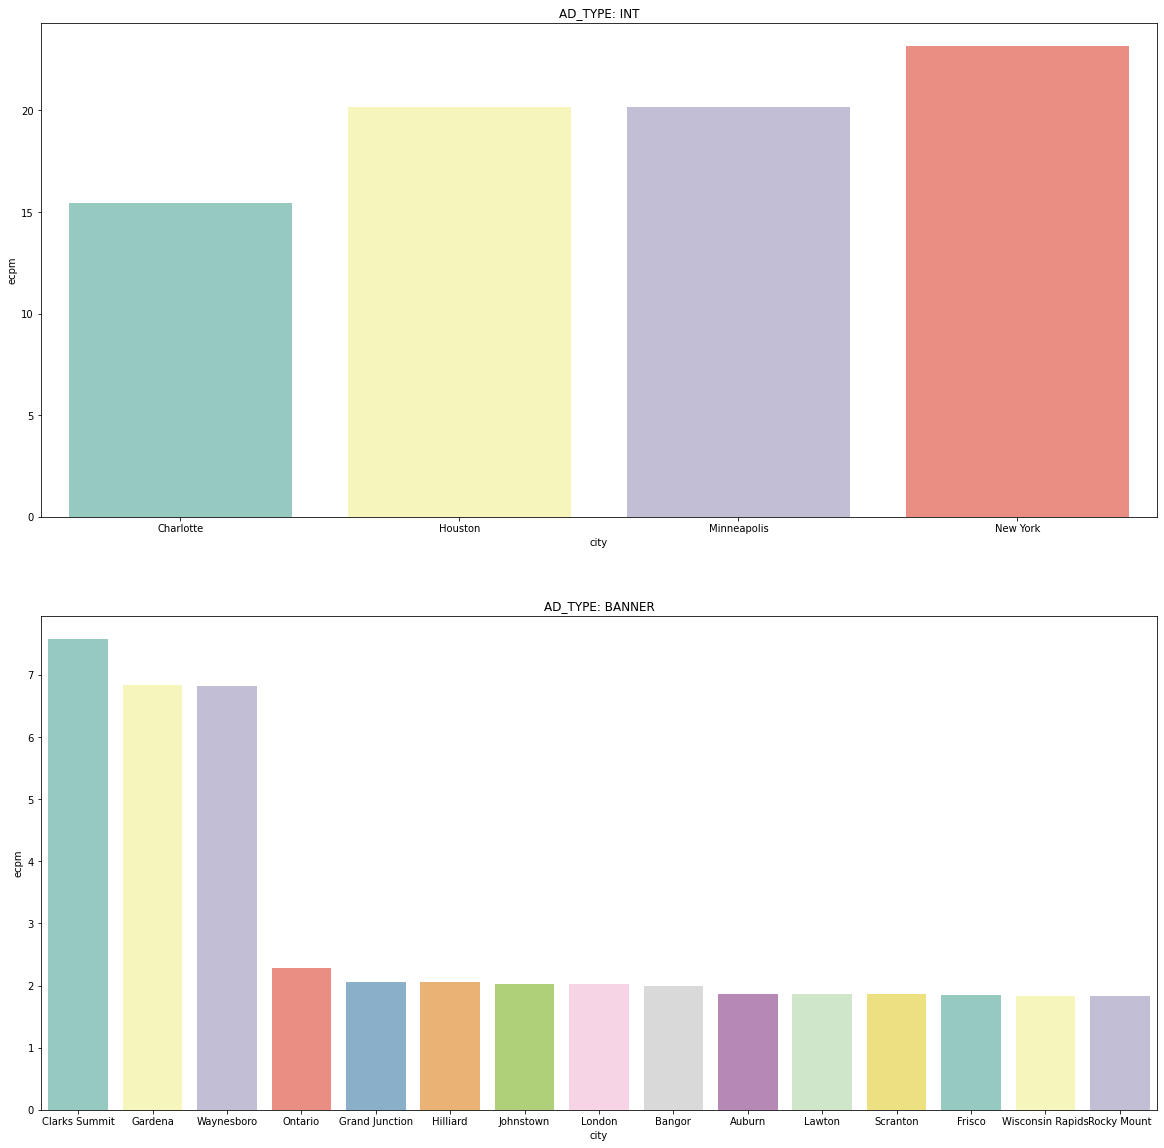

In [31]:
fig, axes = plt.subplots(2,1, figsize=(20,20))

sns.barplot(data=int_df_city.groupby('city')['ecpm'].median().reset_index(), x='city', y='ecpm', palette="Set3", ax=axes[0])
axes[0].set_title('AD_TYPE: INT')

sns.barplot(data=banner_df_city.groupby('city')['ecpm'].median().reset_index().sort_values(by='ecpm', ascending=False)[:15], 
            x='city', y='ecpm', palette="Set3", ax=axes[1])
axes[1].set_title('AD_TYPE: BANNER')

## 1.C. Отобразить суммарные доходы по городам, версиям ОС

Так как revenue – доход от конкретного показа рекламы, то суммарным доходом считаем сумму всех значений revenue

Для начала посмотрим на долю доходов от каждого формата рекламы:

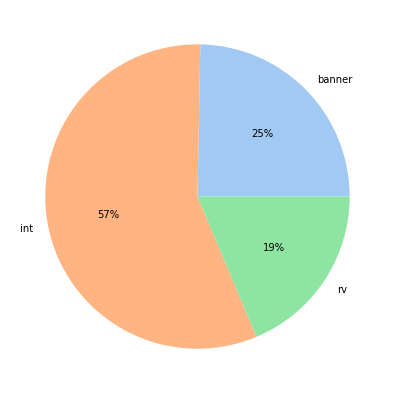

In [33]:
colors = sns.color_palette('pastel')[0:20]

pie_df = df.groupby('ad_type')['revenue'].sum().reset_index()
plt.pie(x=pie_df['revenue'], 
        labels = pie_df['ad_type'], colors = colors, autopct='%.0f%%')
plt.show()

Более 50% доходов приносит реклама формата int... Interesting...

### На этот раз начнем с городов:

Сначала посмотрим на те города, количество наблюдений в которых статистически значимо:

Text(0.5, 1.0, 'AD_TYPE: BANNER')

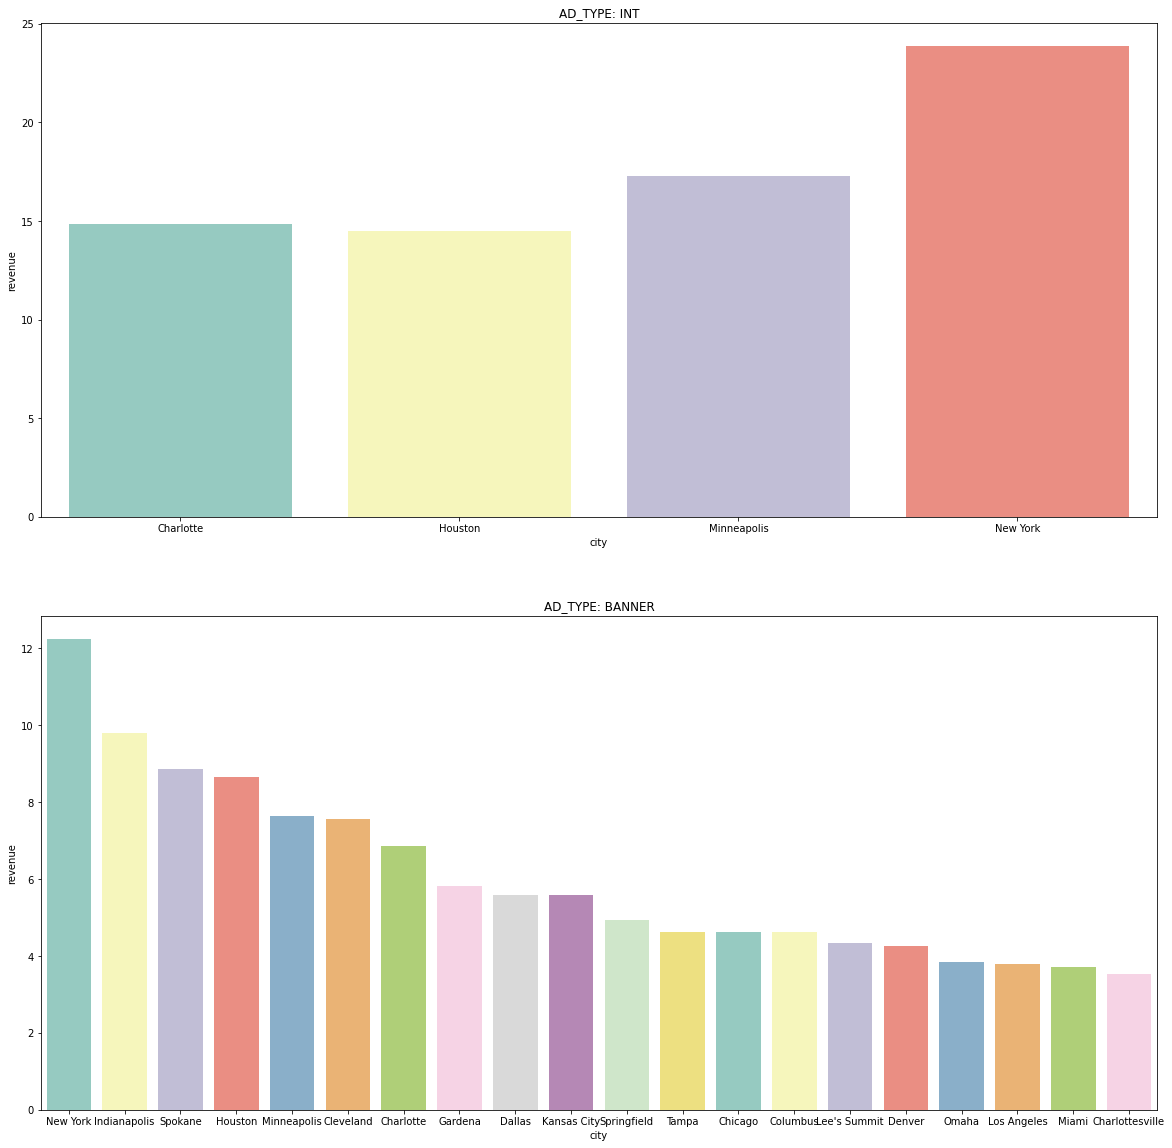

In [34]:
fig, axes = plt.subplots(2,1, figsize=(20,20))

sns.barplot(data=int_df_city.groupby('city')['revenue'].sum().reset_index(), x='city', y='revenue', palette="Set3", ax=axes[0])
axes[0].set_title('AD_TYPE: INT')

sns.barplot(data=banner_df_city.groupby('city')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)[:20], 
            x='city', y='revenue', palette="Set3", ax=axes[1])
axes[1].set_title('AD_TYPE: BANNER')

А теперь можно посмотреть и на остальные:

Text(0.5, 1.0, 'AD_TYPE: RV')

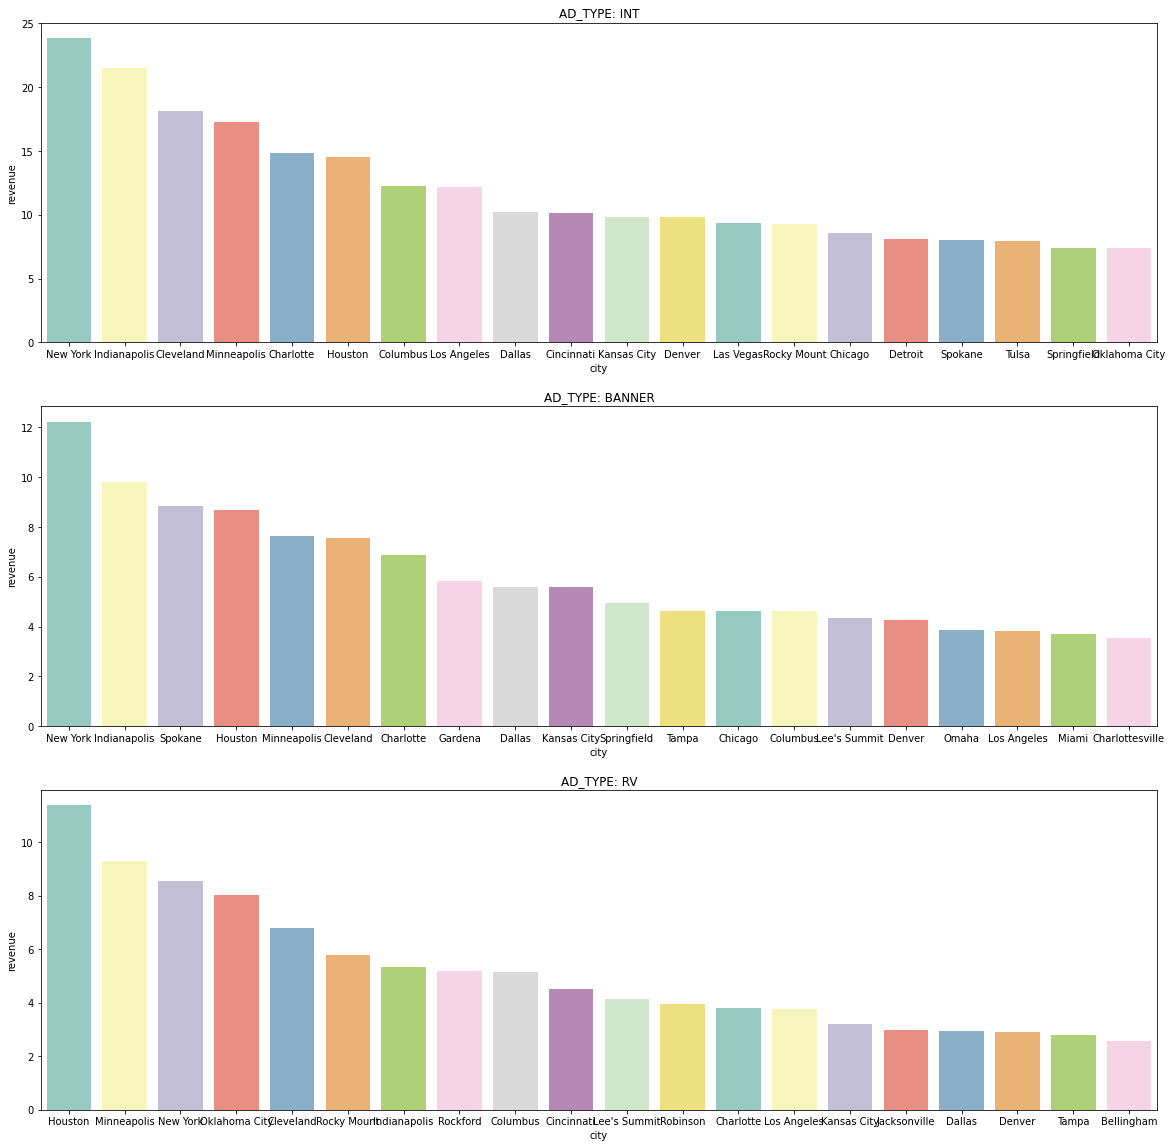

In [35]:
fig, axes = plt.subplots(3,1, figsize=(20,20))

sns.barplot(data=df.loc[df['ad_type']=='int'].groupby('city')['revenue'].sum().reset_index().\
            sort_values(by='revenue', ascending=False)[:20], 
            x='city', y='revenue', palette="Set3", ax=axes[0])
axes[0].set_title('AD_TYPE: INT')

sns.barplot(data=banner_df_city.groupby('city')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)[:20], 
            x='city', y='revenue', palette="Set3", ax=axes[1])
axes[1].set_title('AD_TYPE: BANNER')

sns.barplot(data=df.loc[df['ad_type']=='rv'].groupby('city')['revenue'].sum().reset_index().\
            sort_values(by='revenue', ascending=False)[:20],
            x='city', y='revenue', palette="Set3", ax=axes[2])
axes[2].set_title('AD_TYPE: RV')

### Аналогично в случае с ОС:

Text(0.5, 1.0, 'AD_TYPE: RV')

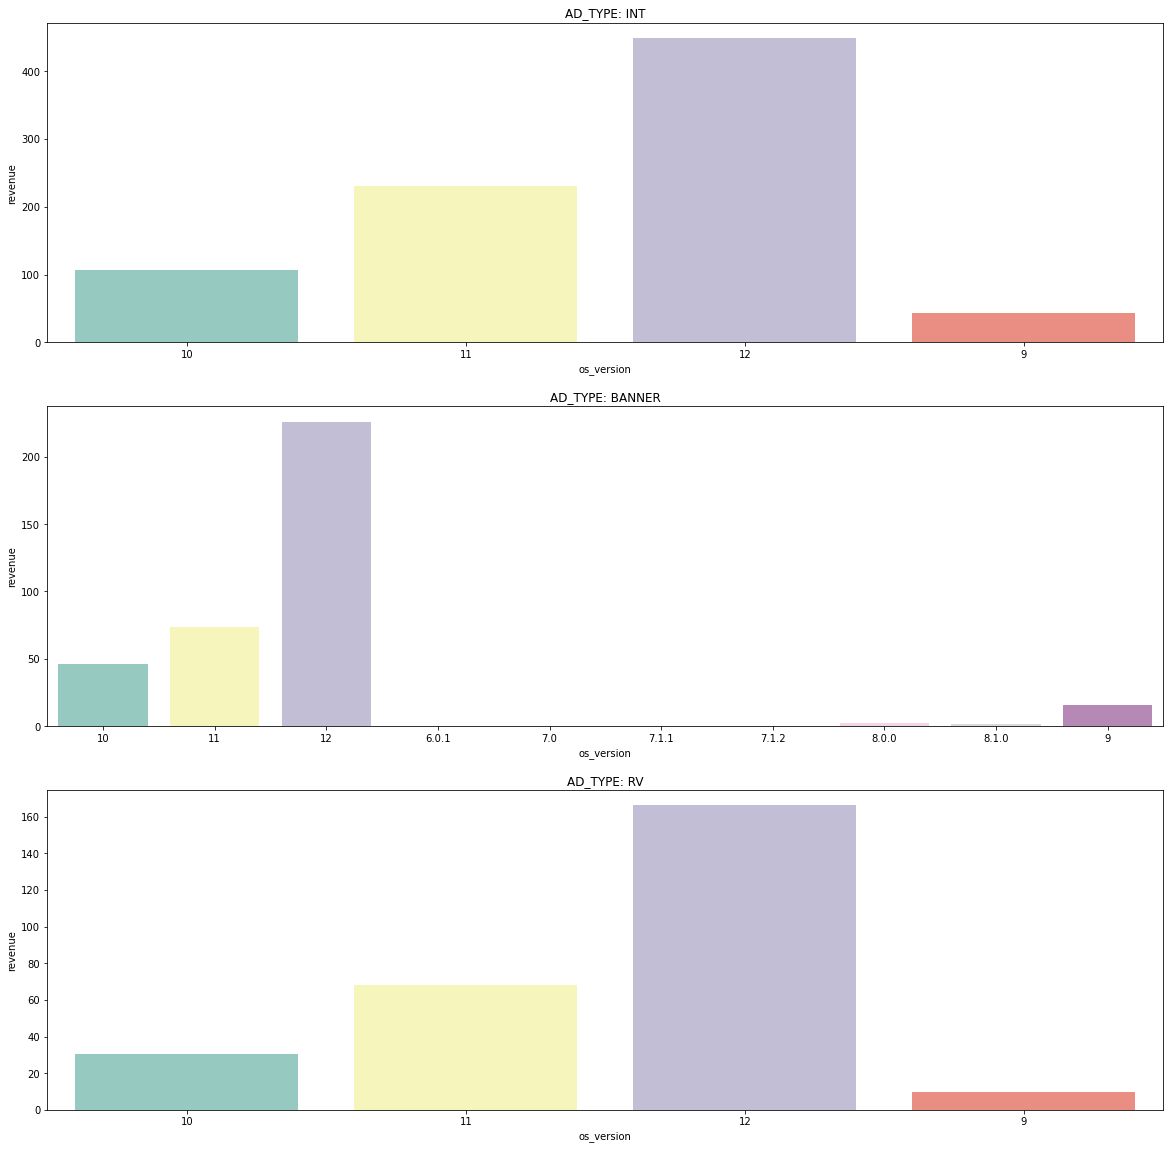

In [36]:
fig, axes = plt.subplots(3,1, figsize=(20,20))

sns.barplot(data=int_df_os.groupby('os_version')['revenue'].sum().reset_index(), 
            x='os_version', y='revenue', palette="Set3", ax=axes[0])
axes[0].set_title('AD_TYPE: INT')

sns.barplot(data=banner_df.groupby('os_version')['revenue'].sum().reset_index(), 
            x='os_version', y='revenue', palette="Set3", ax=axes[1])
axes[1].set_title('AD_TYPE: BANNER')

sns.barplot(data=rv_df_os.groupby('os_version')['revenue'].sum().reset_index(), 
            x='os_version', y='revenue', palette="Set3", ax=axes[2])
axes[2].set_title('AD_TYPE: RV')

Text(0.5, 1.0, 'AD_TYPE: RV')

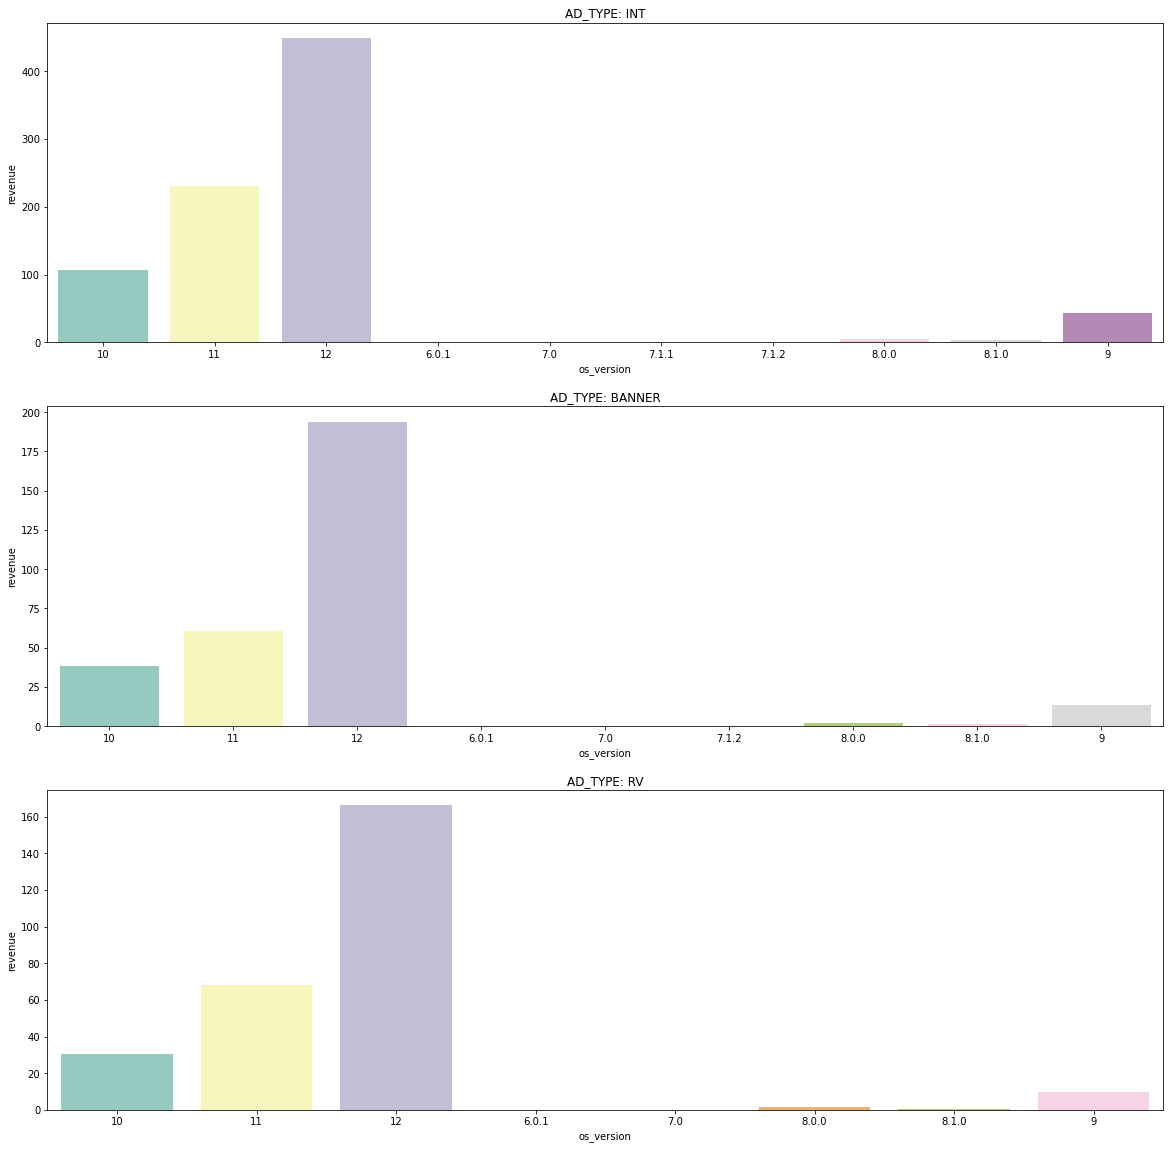

In [37]:
fig, axes = plt.subplots(3,1, figsize=(20,20))

sns.barplot(data=df.loc[df['ad_type']=='int'].groupby('os_version')['revenue'].sum().reset_index(),
            x='os_version', y='revenue', palette="Set3", ax=axes[0])
axes[0].set_title('AD_TYPE: INT')

sns.barplot(data=banner_df_city.groupby('os_version')['revenue'].sum().reset_index(), 
            x='os_version', y='revenue', palette="Set3", ax=axes[1])
axes[1].set_title('AD_TYPE: BANNER')

sns.barplot(data=df.loc[df['ad_type']=='rv'].groupby('os_version')['revenue'].sum().reset_index(),
            x='os_version', y='revenue', palette="Set3", ax=axes[2])
axes[2].set_title('AD_TYPE: RV')

## Можно дополнительно посмотреть на pie - графики, чтобы понять общую долю каждой из версий в доходе

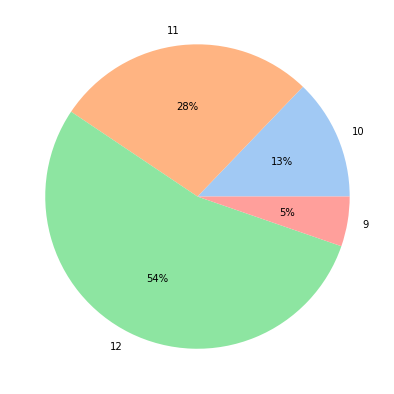

In [38]:
int_pie = int_df_os.groupby('os_version')['revenue'].sum().reset_index()
plt.pie(x=int_pie['revenue'], 
        labels = int_pie['os_version'], colors = colors, autopct='%.0f%%')
plt.show()

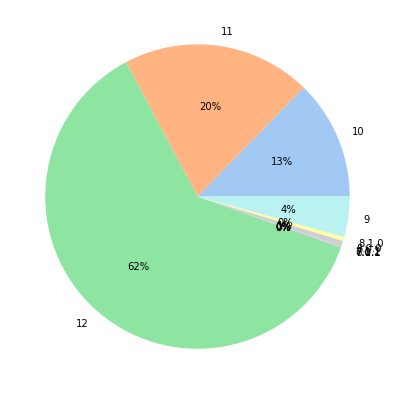

In [39]:
banner_pie = banner_df.groupby('os_version')['revenue'].sum().reset_index()
plt.pie(x=banner_pie['revenue'], 
        labels = banner_pie['os_version'], colors = colors, autopct='%.0f%%')
plt.show()

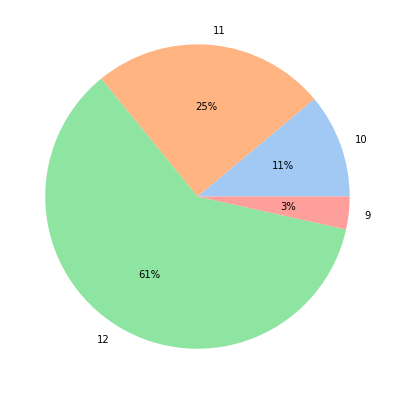

In [40]:
rv_pie = rv_df_os.groupby('os_version')['revenue'].sum().reset_index()
plt.pie(x=rv_pie['revenue'], 
        labels = rv_pie['os_version'], colors = colors, autopct='%.0f%%')
plt.show()

# Краткие выводы:

## Пункт 1.

Были обнаружены статистически значимые различий между средними значениями eCPM-ов пользователей в зависимости от формата рекламы.<br>На основании медианных значений:

MEDIAN: INT 24.596382139148503

MEDIAN: BANNER 0.49687600000000004

MEDIAN: RV 39.8617142857143

Делаем вывод, что форматом рекламы с самым высоким средним ecpm является RV, а с самым низким - Banner

## Пункт 2.

Вне зависимости от формата рекламы мы видим, что у 10, 11 и 12 версий средний ecpm превышает средний ecpm других версий ос. <br>Думаю, что разница дисперсий тут в каком-то смысле даже более интересна.<br><br>
**Для формата рекламы rv** наблюдений по городам недостаточно для проведения анализа.<br>**Для формата int** самый большой средний ecpm наблюдается в new york.<br>**Для формата banner** три города *(Clarks Summit, Gardenia, Waynesboro)* имеют средний ecpm, значительно превышающий ecpm в остальных городах.

## Пункт 3.
ОС 12 версии во всех 3х форматах рекламы приносит более 50% дохода, второе место занимает 11 версия, а третье - 10. Наблюдается четкая тенденция к увеличению дохода при увеличении версии.<br><br>
Доходы по городам убывают более плавно. У форматов Banner и Int города с наибольшим количеством дохода очень сильно пересекаются и при этом почти не пересекаются с городами, где реклама формата rv приносит наибольший доход.<br><br>
Однако, говоря о доходах, следует указать, что даже города, приносящие наибольший доход, составляют менее 3% от доли общего дохода (да, я взяла это не из головы, а посчитала, но ноутбук и так уже нагружен, поэтому этот кусочек кода сюда не включен)

# Зависит ли eCPM от времени дня?

Я так понимаю, в качестве времени дня нужно брать столбец event_datetime, поэтому дальнейшие расчеты будут вестись, исходя из значений времени в этом столбце.

In [55]:
df_time = df[['ecpm', 'event_datetime']].copy()
df_time['event_datetime'] = pd.to_datetime(df_time['event_datetime'])
df_time['hour'] = df_time['event_datetime'].dt.hour
df_time

,ecpm,event_datetime,hour
2,2.386163,2022-02-05 17:53:05,17
3,13.893784,2022-02-06 17:09:01,17
21,1.999664,2022-02-05 18:05:27,18
22,0.530292,2022-02-05 18:05:42,18
23,0.530292,2022-02-05 18:05:57,18
...,...,...,...
860074,0.019972,2022-02-03 08:29:27,8
860075,6.740355,2022-02-03 02:12:51,2
860076,2.780058,2022-02-03 02:13:06,2
860077,2.780058,2022-02-03 02:13:17,2


In [60]:
df_time.groupby('hour')['ecpm'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,26486.0,2.710500,14.683248,0.000317,0.054187,0.496876,0.597983,921.145020
1,29001.0,2.936058,14.762412,0.000200,0.046000,0.496876,0.597983,269.850006
2,27505.0,2.657849,15.220701,0.000192,0.048877,0.496876,0.533385,937.195984
3,29977.0,2.704738,15.084573,0.000229,0.039620,0.437656,0.533385,601.758423
4,34575.0,2.724922,14.715124,0.000230,0.043350,0.437656,0.533385,516.894653
5,38824.0,2.925739,16.089703,0.000181,0.034093,0.437656,0.535226,619.201782
6,35405.0,2.889243,17.423825,0.000080,0.028589,0.437656,0.533385,650.000000
7,34610.0,2.792712,15.328674,0.000000,0.030668,0.437656,0.533385,740.319702
8,23876.0,3.236300,18.949758,0.000215,0.038656,0.496876,0.679700,915.771301


<AxesSubplot:xlabel='hour', ylabel='ecpm'>

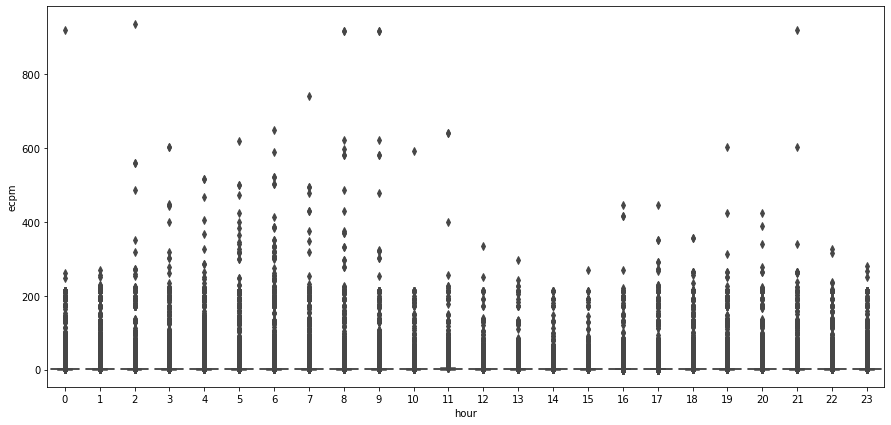

In [63]:
sns.boxplot(y=df_time['ecpm'], x=df_time['hour'])

Ясно, опять выбросы. Тогда попробуем по-другому:

<AxesSubplot:xlabel='hour', ylabel='ecpm'>

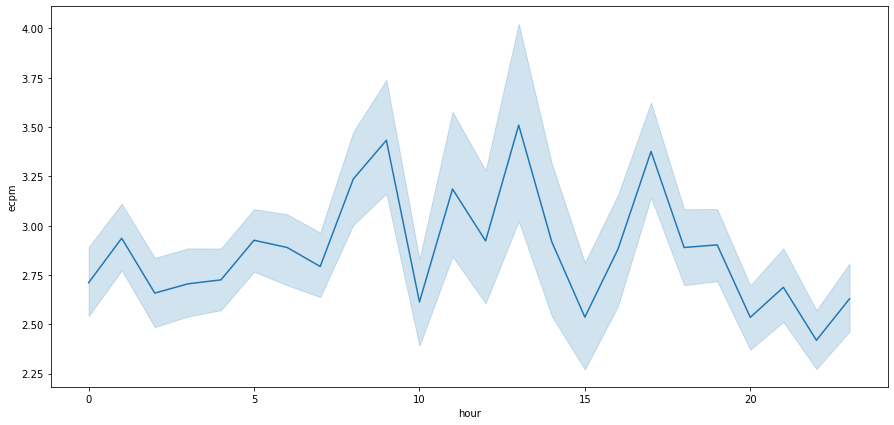

In [66]:
sns.lineplot(x=df_time['hour'], y=df_time['ecpm'])

## А вот тут уже заметны интересные тенденции.
Похоже, что наибольший ecpm мы получаем в период с 9 до 17 дня. Пик приходится на 11 и 13 часов (можно предположить, что это из-за обеда) и на 8-9 часов утра (скорее всего люди играют сразу после того, как проснутся (заходят забрать ежедневные бонусы и все такое))